In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET

% matplotlib inline

In [2]:
tree = ET.parse('export.xml')
root = tree.getroot()

In [3]:
bfp = []
weight = []
for child in root:
    if child.attrib.get('type')== 'HKQuantityTypeIdentifierBodyFatPercentage':
        bfp.append(child.attrib)
    if child.attrib.get('type') == 'HKQuantityTypeIdentifierBodyMass':
        weight.append(child.attrib)

In [4]:
dates = [pd.to_datetime(data['creationDate']).date() for data in bfp]

df = pd.DataFrame(
    data=np.array([
        [float(data['value']) for data in bfp], 
        [float(data['value']) for data in weight if pd.to_datetime(data['creationDate']).date() in dates],
    ]).T,
    index=dates,
    columns=['bfp', 'weight'],
)
df['fat_weight'] = df.bfp * df.weight
df.sort_index(inplace=True)

In [6]:
df.to_csv('health.csv')

In [106]:
df[['bfp', 'weight']].corr()

,bfp,weight
bfp,1.00000,0.98927
weight,0.98927,1.00000


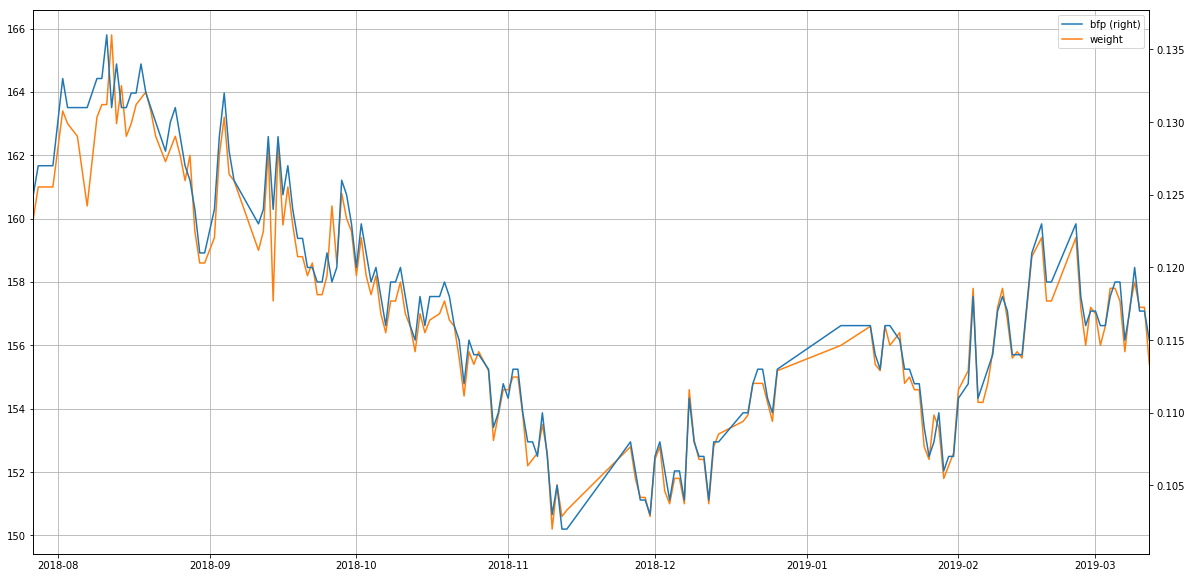

In [128]:
df[['bfp', 'weight']].plot(figsize=(20, 10), secondary_y='bfp', grid=True)

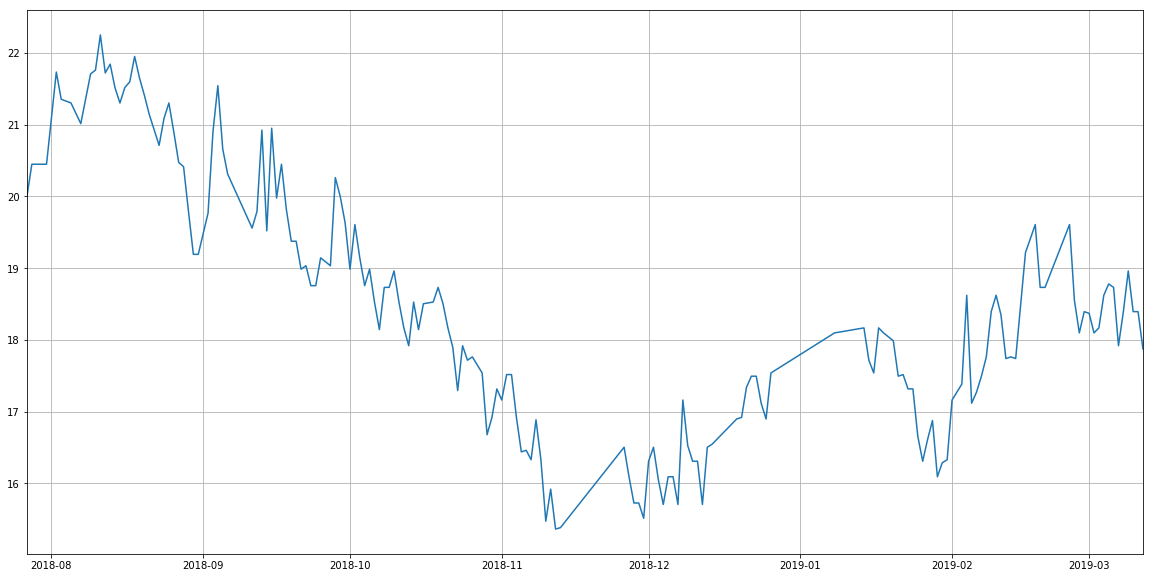

In [129]:
df.fat_weight.plot(figsize=(20, 10), grid=True)

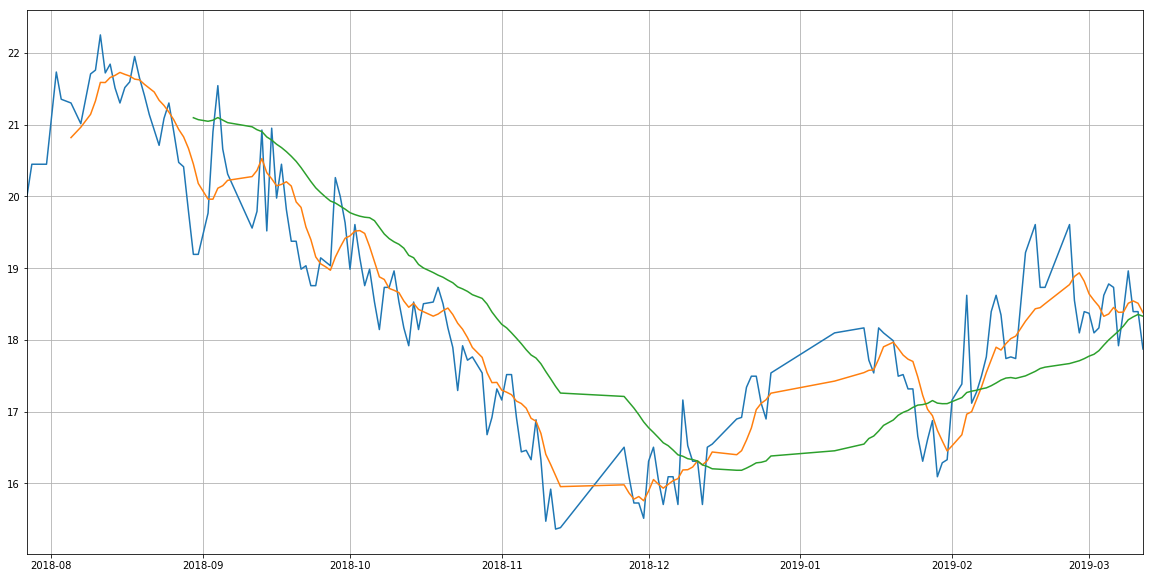

In [120]:
df.fat_weight.plot(figsize=(20, 10))
df.rolling(window=7).mean().fat_weight.plot(figsize=(20, 10))
df.rolling(window=30).mean().fat_weight.plot(figsize=(20, 10), grid=True)

In [123]:
np.max(df) - np.min(df)

bfp            0.0340
weight        15.6000
fat_weight     6.8884
dtype: float64